<a href="https://colab.research.google.com/github/ramiltaief/Recharge_prjt/blob/main/futur_recharge_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!jt -r
#default theme

#from jupyterthemes import jtplot
#jtplot.style()
#dark
#!pip install xgboost
#!jt -t chesterish

In [ ]:
from os import getcwd, listdir
path="C:/Users/ramil/Desktop/TOUS/Machine Learning/projet"
files=listdir(path)

In [ ]:
import pandas as pd
fulltab=pd.read_csv('C:/Users/ramil/Desktop/TOUS/Machine Learning/projet/aflag.csv', delimiter=";")
for file in files[1:]:
    tabtmp= pd.read_csv(path+"/"+file, delimiter=";")
    del tabtmp["FLAG"]
    fulltab=pd.merge(fulltab,tabtmp, on="MSISDN",how="left")

In [ ]:
fulltab["FLAG"]=fulltab["FLAG"].str.replace(',','.').astype(float)
fulltab["MONTANT_SOS"]=fulltab["MONTANT_SOS"].str.replace(',','.').astype(float)

In [ ]:
fulltab.isnull().sum().sort_values()

MSISDN                        0
FLAG                          0
NB_RECHARGE                   0
LIFE_TIME                    27
NB_APPEL_ENTRANT             81
NB_APPEL_SORTANT            315
MAX_BTW_APPEL_ENTRANT      1408
MIN_BTW_APPEL_ENTRANT      1408
LAST_DISTANCE_ENTRANT      1625
MONTANT_RECHARGE           2009
MAX_BTW_APPEL_SORTANT      2433
MIN_BTW_APPEL_SORTANT      2433
LAST_DISTANCE_RECHARGE     2459
MIN_BTW_RECHARGE           2620
MAX_BTW_RECHARGE           2620
LAST_DISTANCE_SORTANT      2622
NB_ACHAT_OPTION           11835
NB_SOS                    12550
LAST_DISTANCE_ACHAT       12669
LAST_DISTANCE_SOS         14174
MIN_BTWACHAT              14483
MAX_BTWACHAT              14483
MONTANT_SOS               14879
MIN_BTW_SOS               15120
MAX_BTW_SOS               15120
MONTANT_DATA              33703
dtype: int64

In [ ]:
del fulltab['MONTANT_RECHARGE']

del fulltab["MONTANT_DATA"]

In [ ]:
fulltab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50007 entries, 0 to 50006
Data columns (total 24 columns):
MSISDN                    50007 non-null int64
FLAG                      50007 non-null float64
LAST_DISTANCE_ACHAT       37338 non-null float64
LAST_DISTANCE_ENTRANT     48382 non-null float64
LAST_DISTANCE_RECHARGE    47548 non-null float64
LAST_DISTANCE_SORTANT     47385 non-null float64
LAST_DISTANCE_SOS         35833 non-null float64
LIFE_TIME                 49980 non-null float64
MIN_BTWACHAT              35524 non-null float64
MAX_BTWACHAT              35524 non-null float64
MIN_BTW_APPEL_ENTRANT     48599 non-null float64
MAX_BTW_APPEL_ENTRANT     48599 non-null float64
MIN_BTW_APPEL_SORTANT     47574 non-null float64
MAX_BTW_APPEL_SORTANT     47574 non-null float64
MIN_BTW_RECHARGE          47387 non-null float64
MAX_BTW_RECHARGE          47387 non-null float64
MIN_BTW_SOS               34887 non-null float64
MAX_BTW_SOS               34887 non-null float64
MONTANT_SOS

In [ ]:
fulltab.isnull().sum().sort_values()

MSISDN                        0
FLAG                          0
NB_RECHARGE                   0
LIFE_TIME                    27
NB_APPEL_ENTRANT             81
NB_APPEL_SORTANT            315
MIN_BTW_APPEL_ENTRANT      1408
MAX_BTW_APPEL_ENTRANT      1408
LAST_DISTANCE_ENTRANT      1625
MIN_BTW_APPEL_SORTANT      2433
MAX_BTW_APPEL_SORTANT      2433
LAST_DISTANCE_RECHARGE     2459
MIN_BTW_RECHARGE           2620
MAX_BTW_RECHARGE           2620
LAST_DISTANCE_SORTANT      2622
NB_ACHAT_OPTION           11835
NB_SOS                    12550
LAST_DISTANCE_ACHAT       12669
LAST_DISTANCE_SOS         14174
MIN_BTWACHAT              14483
MAX_BTWACHAT              14483
MONTANT_SOS               14879
MIN_BTW_SOS               15120
MAX_BTW_SOS               15120
dtype: int64

In [ ]:
fulltab=fulltab.dropna(subset=['MAX_BTW_SOS'])

In [ ]:
import numpy as np
for col in list(fulltab.isnull().sum().sort_values()[fulltab.isnull().sum().sort_values()>0].index):
    fulltab[col]=fulltab[col].fillna(np.mean(fulltab[col]))

In [ ]:
fulltab.isnull().sum().sort_values()

MSISDN                    0
NB_APPEL_SORTANT          0
NB_APPEL_ENTRANT          0
NB_ACHAT_OPTION           0
MONTANT_SOS               0
MAX_BTW_SOS               0
MIN_BTW_SOS               0
MAX_BTW_RECHARGE          0
MIN_BTW_RECHARGE          0
MAX_BTW_APPEL_SORTANT     0
MIN_BTW_APPEL_SORTANT     0
MAX_BTW_APPEL_ENTRANT     0
MIN_BTW_APPEL_ENTRANT     0
MAX_BTWACHAT              0
MIN_BTWACHAT              0
LIFE_TIME                 0
LAST_DISTANCE_SOS         0
LAST_DISTANCE_SORTANT     0
LAST_DISTANCE_RECHARGE    0
LAST_DISTANCE_ENTRANT     0
LAST_DISTANCE_ACHAT       0
FLAG                      0
NB_RECHARGE               0
NB_SOS                    0
dtype: int64

In [ ]:
#fulltab_s_df

In [ ]:
fulltab.iloc[:,2:].describe().round(2)

,LAST_DISTANCE_ACHAT,LAST_DISTANCE_ENTRANT,LAST_DISTANCE_RECHARGE,LAST_DISTANCE_SORTANT,LAST_DISTANCE_SOS,LIFE_TIME,MIN_BTWACHAT,MAX_BTWACHAT,MIN_BTW_APPEL_ENTRANT,MAX_BTW_APPEL_ENTRANT,...,MIN_BTW_RECHARGE,MAX_BTW_RECHARGE,MIN_BTW_SOS,MAX_BTW_SOS,MONTANT_SOS,NB_ACHAT_OPTION,NB_APPEL_ENTRANT,NB_APPEL_SORTANT,NB_RECHARGE,NB_SOS
count,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,...,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00
mean,23.00,14.19,13.54,12.10,22.37,1036.51,3.04,22.25,1.00,4.00,...,1.40,12.86,1.90,19.36,25.52,36.18,1636.56,1205.78,8.05,24.52
std,24.24,15.60,18.85,19.05,25.72,663.61,7.88,15.79,0.04,7.45,...,3.42,11.89,5.43,17.03,32.29,38.29,1450.54,1239.89,3.52,32.53
min,3.00,5.00,5.00,4.00,4.00,3.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,0.40,1.00,26.00,1.00,1.00,1.00
25%,6.00,7.00,5.00,5.00,6.00,457.00,1.00,11.00,1.00,1.00,...,1.00,6.00,1.00,7.00,4.45,10.00,772.00,437.00,6.00,4.00
50%,15.00,10.00,6.00,5.00,9.00,954.00,1.00,22.25,1.00,2.00,...,1.00,10.00,1.00,14.00,14.03,30.00,1275.00,870.00,7.00,12.00
75%,23.00,15.00,11.00,7.00,28.00,1528.00,3.04,26.00,1.00,3.00,...,1.00,15.00,1.00,26.00,34.23,42.00,2044.00,1560.00,10.00,32.00
max,112.00,113.00,113.00,113.00,113.00,3395.00,120.00,120.00,9.00,113.00,...,113.00,113.00,113.00,117.00,625.55,695.00,41639.00,25000.00,37.00,482.00


In [ ]:
fulltab.iloc[:,:]

,MSISDN,FLAG,LAST_DISTANCE_ACHAT,LAST_DISTANCE_ENTRANT,LAST_DISTANCE_RECHARGE,LAST_DISTANCE_SORTANT,LAST_DISTANCE_SOS,LIFE_TIME,MIN_BTWACHAT,MAX_BTWACHAT,...,MIN_BTW_RECHARGE,MAX_BTW_RECHARGE,MIN_BTW_SOS,MAX_BTW_SOS,MONTANT_SOS,NB_ACHAT_OPTION,NB_APPEL_ENTRANT,NB_APPEL_SORTANT,NB_RECHARGE,NB_SOS
0,52862194,66.000,4.0,15.0,5.0,5.0,5.0,1598.0,2.0,44.0,...,1.0,21.0,1.0,18.0,17.72,25.0,776.0,348.0,6,12.0
1,52558939,74.000,5.0,12.0,6.0,5.0,7.0,1742.0,1.0,42.0,...,1.0,15.0,1.0,14.0,30.34,23.0,1730.0,510.0,7,36.0
2,52549377,330.700,4.0,8.0,5.0,5.0,65.0,1851.0,1.0,11.0,...,1.0,10.0,1.0,39.0,0.95,110.0,4738.0,5003.0,13,12.0
3,54046085,90.000,4.0,7.0,5.0,5.0,5.0,488.0,2.0,13.0,...,2.0,13.0,1.0,10.0,44.25,27.0,620.0,631.0,5,17.0
4,56091698,123.000,4.0,12.0,5.0,5.0,5.0,589.0,1.0,32.0,...,1.0,5.0,1.0,4.0,63.07,10.0,2352.0,1247.0,6,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,24246342,88.000,4.0,11.0,5.0,4.0,31.0,618.0,1.0,31.0,...,1.0,10.0,1.0,17.0,27.90,17.0,2444.0,954.0,8,13.0
50001,55221612,89.000,94.0,89.0,95.0,89.0,89.0,216.0,3.0,4.0,...,1.0,13.0,1.0,13.0,4.40,4.0,1002.0,1254.0,3,20.0
50002,53240609,98.544,44.0,50.0,45.0,45.0,63.0,398.0,1.0,32.0,...,1.0,11.0,1.0,4.0,25.20,18.0,3173.0,1808.0,7,33.0
50003,58866601,273.000,23.0,5.0,16.0,5.0,5.0,1710.0,1.0,21.0,...,1.0,13.0,1.0,14.0,49.91,16.0,2588.0,2564.0,9,24.0


In [ ]:
from sklearn.preprocessing import StandardScaler

fulltab_s = StandardScaler().fit_transform(fulltab.iloc[:,2:])


fulltab_s_df = pd.DataFrame(fulltab_s, index=fulltab.index, columns=list(fulltab.columns)[2:]);

C:\Users\ramil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ramil\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
fulltab_s_df.describe().round(2)

,LAST_DISTANCE_ACHAT,LAST_DISTANCE_ENTRANT,LAST_DISTANCE_RECHARGE,LAST_DISTANCE_SORTANT,LAST_DISTANCE_SOS,LIFE_TIME,MIN_BTWACHAT,MAX_BTWACHAT,MIN_BTW_APPEL_ENTRANT,MAX_BTW_APPEL_ENTRANT,...,MIN_BTW_RECHARGE,MAX_BTW_RECHARGE,MIN_BTW_SOS,MAX_BTW_SOS,MONTANT_SOS,NB_ACHAT_OPTION,NB_APPEL_ENTRANT,NB_APPEL_SORTANT,NB_RECHARGE,NB_SOS
count,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,...,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.83,-0.59,-0.45,-0.43,-0.71,-1.56,-0.26,-1.35,-0.01,-0.40,...,-0.12,-1.00,-0.17,-1.08,-0.78,-0.92,-1.11,-0.97,-2.00,-0.72
25%,-0.70,-0.46,-0.45,-0.37,-0.64,-0.87,-0.26,-0.71,-0.01,-0.40,...,-0.12,-0.58,-0.17,-0.73,-0.65,-0.68,-0.60,-0.62,-0.58,-0.63
50%,-0.33,-0.27,-0.40,-0.37,-0.52,-0.12,-0.26,0.00,-0.01,-0.27,...,-0.12,-0.24,-0.17,-0.31,-0.36,-0.16,-0.25,-0.27,-0.30,-0.38
75%,-0.00,0.05,-0.13,-0.27,0.22,0.74,-0.00,0.24,-0.01,-0.13,...,-0.12,0.18,-0.17,0.39,0.27,0.15,0.28,0.29,0.55,0.23
max,3.67,6.33,5.28,5.30,3.52,3.55,14.84,6.19,186.78,14.62,...,32.67,8.42,20.45,5.73,18.58,17.20,27.58,19.19,8.22,14.06


,LAST_DISTANCE_ACHAT,LAST_DISTANCE_ENTRANT,LAST_DISTANCE_RECHARGE,LAST_DISTANCE_SORTANT,LAST_DISTANCE_SOS,LIFE_TIME,MIN_BTWACHAT,MAX_BTWACHAT,MIN_BTW_APPEL_ENTRANT,MAX_BTW_APPEL_ENTRANT,MIN_BTW_APPEL_SORTANT,MAX_BTW_APPEL_SORTANT,MIN_BTW_RECHARGE,MAX_BTW_RECHARGE,MIN_BTW_SOS,MAX_BTW_SOS,MONTANT_SOS,NB_ACHAT_OPTION,NB_APPEL_ENTRANT,NB_APPEL_SORTANT,NB_RECHARGE,NB_SOS
LAST_DISTANCE_ACHAT,1,0.39,0.52,0.49,0.28,-0.073,0.12,-0.047,-3e-19,0.12,0.011,0.14,0.049,0.13,0.036,-0.039,-0.1,-0.37,-0.16,-0.18,-0.29,-0.046
LAST_DISTANCE_ENTRANT,0.39,1,0.76,0.78,0.49,-0.13,-0.0094,-0.12,0.0082,0.039,0.0094,-0.046,0.023,-0.066,0.011,-0.12,-0.089,-0.092,-0.13,-0.12,-0.26,-0.074
LAST_DISTANCE_RECHARGE,0.52,0.76,1,0.93,0.62,-0.14,0.012,-0.09,0.02,0.18,0.024,0.095,0.12,0.08,0.091,-0.068,-0.16,-0.16,-0.19,-0.19,-0.34,-0.14
LAST_DISTANCE_SORTANT,0.49,0.78,0.93,1,0.59,-0.14,0.0094,-0.092,0.02,0.18,0.048,0.091,0.11,0.074,0.085,-0.068,-0.14,-0.14,-0.19,-0.2,-0.34,-0.12
LAST_DISTANCE_SOS,0.28,0.49,0.62,0.59,1,-0.068,0.008,-0.12,0.013,0.11,0.021,0.055,0.077,0.056,0.12,-0.1,-0.32,-0.057,-0.19,-0.17,-0.26,-0.31
LIFE_TIME,-0.073,-0.13,-0.14,-0.14,-0.068,1,0.0084,-0.0048,-0.0072,-0.086,-0.0016,-0.061,-0.0065,-0.019,-0.0065,0.0072,-0.051,-0.0087,-0.011,-0.016,0.12,-0.034
MIN_BTWACHAT,0.12,-0.0094,0.012,0.0094,0.008,0.0084,1,0.36,5.7e-18,0.036,0.0064,0.086,0.036,0.098,0.019,0.022,-0.057,-0.19,-0.059,-0.069,-0.075,-0.037
MAX_BTWACHAT,-0.047,-0.12,-0.09,-0.092,-0.12,-0.0048,0.36,1,2.9e-19,0.14,0.0031,0.26,0.024,0.3,0.017,0.065,-0.022,-0.4,-0.1,-0.14,-0.069,0.05
MIN_BTW_APPEL_ENTRANT,-3e-19,0.0082,0.02,0.02,0.013,-0.0072,5.7e-18,2.9e-19,1,0.03,0.11,0.0063,0.035,0.005,0.022,0.0015,-6.6e-17,-2.7e-19,-0.0055,-0.004,-0.0092,-0.0032
MAX_BTW_APPEL_ENTRANT,0.12,0.039,0.18,0.18,0.11,-0.086,0.036,0.14,0.03,1,0.018,0.51,0.096,0.48,0.092,0.17,-0.12,-0.11,-0.18,-0.17,-0.18,-0.11


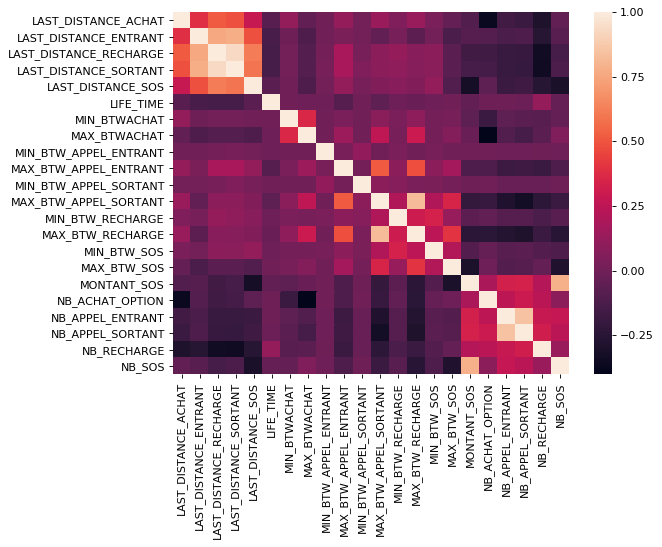

In [ ]:
import pandas as com

import seaborn as sns

%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')



# calculate the correlation matrix
corr = fulltab_s_df.corr()
figsize=(10,10);
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "6pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "8pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '60px'),
                        ('font-size', '8pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
del fulltab_s_df["LAST_DISTANCE_SORTANT"]

del fulltab_s_df["NB_SOS"]

del fulltab_s_df["LAST_DISTANCE_ENTRANT"]

del fulltab_s_df["NB_APPEL_ENTRANT"]0

del fulltab_s_df["MAX_BTW_APPEL_SORTANT"]

,LAST_DISTANCE_ACHAT,LAST_DISTANCE_RECHARGE,LAST_DISTANCE_SOS,LIFE_TIME,MIN_BTWACHAT,MAX_BTWACHAT,MIN_BTW_APPEL_ENTRANT,MAX_BTW_APPEL_ENTRANT,MIN_BTW_APPEL_SORTANT,MIN_BTW_RECHARGE,MAX_BTW_RECHARGE,MIN_BTW_SOS,MAX_BTW_SOS,MONTANT_SOS,NB_ACHAT_OPTION,NB_APPEL_SORTANT,NB_RECHARGE
LAST_DISTANCE_ACHAT,1,0.52,0.28,-0.073,0.12,-0.047,-3e-19,0.12,0.011,0.049,0.13,0.036,-0.039,-0.1,-0.37,-0.18,-0.29
LAST_DISTANCE_RECHARGE,0.52,1,0.62,-0.14,0.012,-0.09,0.02,0.18,0.024,0.12,0.08,0.091,-0.068,-0.16,-0.16,-0.19,-0.34
LAST_DISTANCE_SOS,0.28,0.62,1,-0.068,0.008,-0.12,0.013,0.11,0.021,0.077,0.056,0.12,-0.1,-0.32,-0.057,-0.17,-0.26
LIFE_TIME,-0.073,-0.14,-0.068,1,0.0084,-0.0048,-0.0072,-0.086,-0.0016,-0.0065,-0.019,-0.0065,0.0072,-0.051,-0.0087,-0.016,0.12
MIN_BTWACHAT,0.12,0.012,0.008,0.0084,1,0.36,5.7e-18,0.036,0.0064,0.036,0.098,0.019,0.022,-0.057,-0.19,-0.069,-0.075
MAX_BTWACHAT,-0.047,-0.09,-0.12,-0.0048,0.36,1,2.9e-19,0.14,0.0031,0.024,0.3,0.017,0.065,-0.022,-0.4,-0.14,-0.069
MIN_BTW_APPEL_ENTRANT,-3e-19,0.02,0.013,-0.0072,5.7e-18,2.9e-19,1,0.03,0.11,0.035,0.005,0.022,0.0015,-6.6e-17,-2.7e-19,-0.004,-0.0092
MAX_BTW_APPEL_ENTRANT,0.12,0.18,0.11,-0.086,0.036,0.14,0.03,1,0.018,0.096,0.48,0.092,0.17,-0.12,-0.11,-0.17,-0.18
MIN_BTW_APPEL_SORTANT,0.011,0.024,0.021,-0.0016,0.0064,0.0031,0.11,0.018,1,0.071,0.037,0.037,0.019,-0.0094,0.00075,-0.029,-0.024
MIN_BTW_RECHARGE,0.049,0.12,0.077,-0.0065,0.036,0.024,0.035,0.096,0.071,1,0.3,0.33,0.13,-0.065,-0.05,-0.087,-0.13


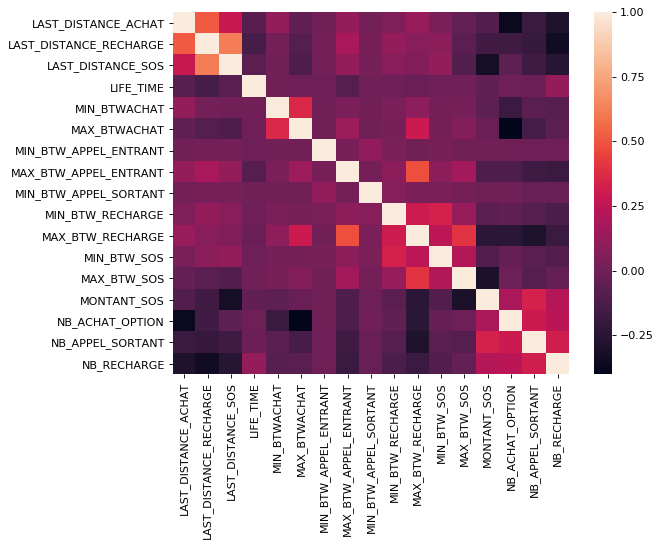

In [ ]:
import pandas as com

import seaborn as sns

%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')



# calculate the correlation matrix
corr = fulltab_s_df.corr()
figsize=(10,10);
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "8pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '80px'),
                        ('font-size', '8pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
fulltab_df_finale=pd.concat([fulltab[["MSISDN","FLAG"]], fulltab_s_df], axis=1)

In [ ]:
fulltab_df_finale.describe().round(2)

,MSISDN,FLAG,LAST_DISTANCE_ACHAT,LAST_DISTANCE_RECHARGE,LAST_DISTANCE_SOS,LIFE_TIME,MIN_BTWACHAT,MAX_BTWACHAT,MIN_BTW_APPEL_ENTRANT,MAX_BTW_APPEL_ENTRANT,MIN_BTW_APPEL_SORTANT,MIN_BTW_RECHARGE,MAX_BTW_RECHARGE,MIN_BTW_SOS,MAX_BTW_SOS,MONTANT_SOS,NB_ACHAT_OPTION,NB_APPEL_SORTANT,NB_RECHARGE
count,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00,34887.00
mean,53478837.82,111.81,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,7702793.82,86.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,20007729.00,2.00,-0.83,-0.45,-0.71,-1.56,-0.26,-1.35,-0.01,-0.40,-0.03,-0.12,-1.00,-0.17,-1.08,-0.78,-0.92,-0.97,-2.00
25%,52088565.00,54.00,-0.70,-0.45,-0.64,-0.87,-0.26,-0.71,-0.01,-0.40,-0.03,-0.12,-0.58,-0.17,-0.73,-0.65,-0.68,-0.62,-0.58
50%,53938983.00,90.83,-0.33,-0.40,-0.52,-0.12,-0.26,0.00,-0.01,-0.27,-0.03,-0.12,-0.24,-0.17,-0.31,-0.36,-0.16,-0.27,-0.30
75%,55652672.50,145.00,-0.00,-0.13,0.22,0.74,-0.00,0.24,-0.01,-0.13,-0.03,-0.12,0.18,-0.17,0.39,0.27,0.15,0.29,0.55
max,99971943.00,1919.39,3.67,5.28,3.52,3.55,14.84,6.19,186.78,14.62,82.46,32.67,8.42,20.45,5.73,18.58,17.20,19.19,8.22


In [ ]:
msisdn=fulltab_df_finale['MSISDN']

X=fulltab_df_finale.drop(["MSISDN",'FLAG'],axis=1)

Y=fulltab_df_finale['FLAG']


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24420, 17)
(10467, 17)
(24420,)
(10467,)


In [ ]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
from sklearn.metrics import r2_score

# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = np.round(r2_score(Y_test, y_test_predict),2)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 49.058068263920106
le score R2 est 0.69


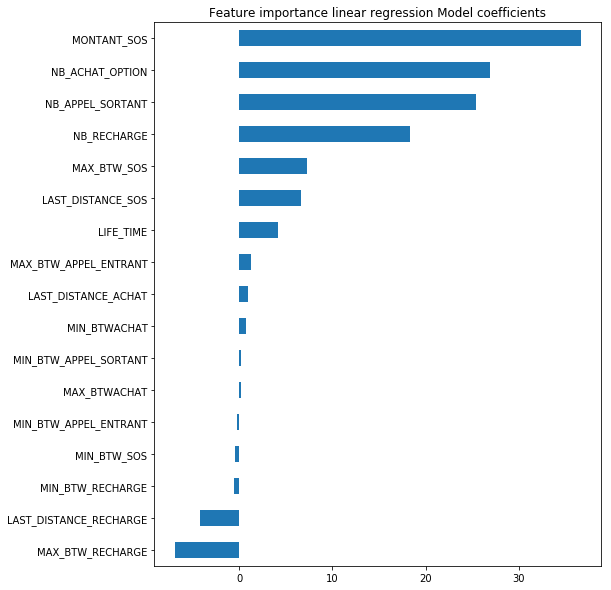

In [ ]:
np.round(lmodellineaire.coef_,2)
coef = pd.Series(lmodellineaire.coef_, index = X.columns)
imp_coef = coef.sort_values()

from matplotlib.pyplot import plot as plt, title

from matplotlib import rcParams

rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
title("Feature importance linear regression Model coefficients");

In [ ]:
imp_coef.round(2)

MAX_BTW_RECHARGE          -6.90
LAST_DISTANCE_RECHARGE    -4.22
MIN_BTW_RECHARGE          -0.53
MIN_BTW_SOS               -0.45
MIN_BTW_APPEL_ENTRANT     -0.19
MAX_BTWACHAT               0.20
MIN_BTW_APPEL_SORTANT      0.25
MIN_BTWACHAT               0.77
LAST_DISTANCE_ACHAT        1.00
MAX_BTW_APPEL_ENTRANT      1.27
LIFE_TIME                  4.20
LAST_DISTANCE_SOS          6.61
MAX_BTW_SOS                7.28
NB_RECHARGE               18.35
NB_APPEL_SORTANT          25.45
NB_ACHAT_OPTION           26.87
MONTANT_SOS               36.60
dtype: float64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents_test = pca.fit_transform(X_test)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents_train = pca.fit_transform(X_train)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

C:\Users\ramil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


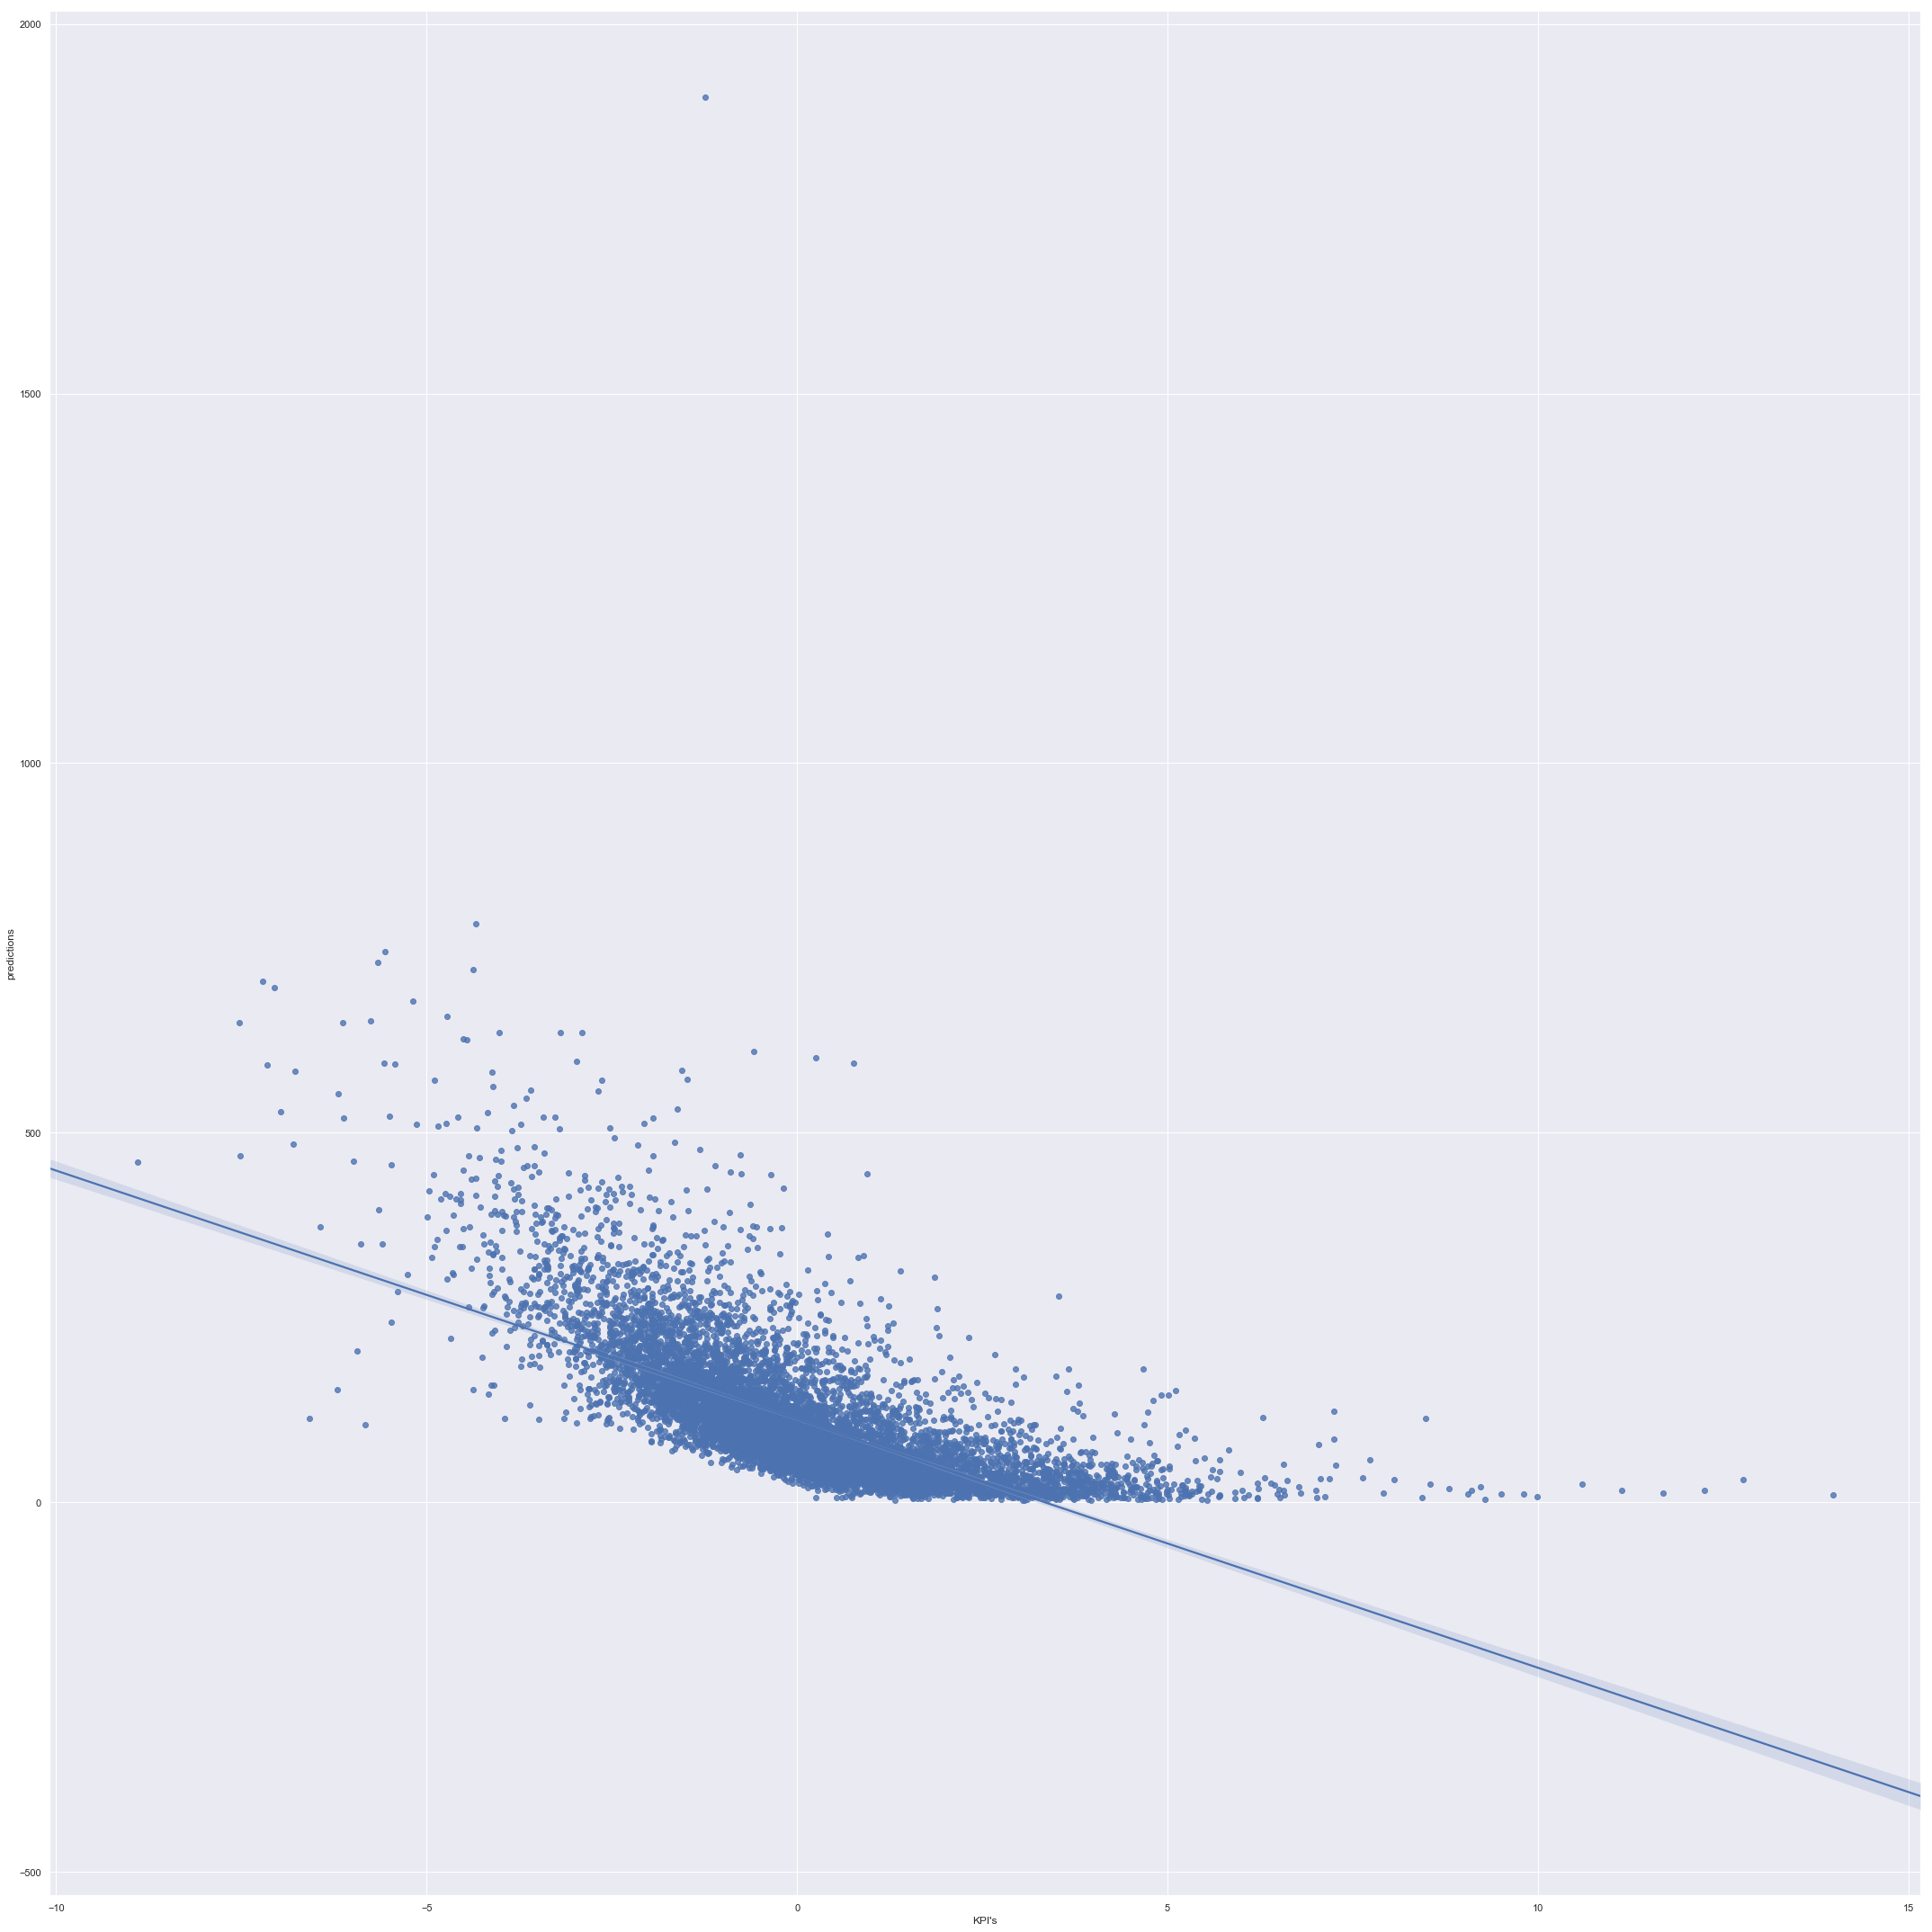

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
regre=pd.DataFrame()
regre["KPI's"]=pd.Series(list(principalComponents_test)).astype(float).round(2)
regre["predictions"]=pd.Series(list(Y_test)).astype(float).round(2)
g = sns.lmplot(x="KPI's", y="predictions", data=regre, height=30)